In [1]:
import json
import pandas as pd
import lang2vec.lang2vec  as l2v
import matplotlib.pyplot as plt

from analysis import *

In [2]:
path = "../pos/results.json"

# Results structure: {lang_eval: {lang_train: {data_fraction: {metric: score}}}}
with open(path, 'r') as file:
    pos_results_per_eval = json.load(file)

In [3]:
path = "../nli/results.json"

# Results structure: {lang_eval: {lang_train: {data_fraction: {metric: score}}}}
with open(path, 'r') as file:
    nli_results_per_eval = json.load(file)

In [4]:
nli_languages = sorted(list(nli_results_per_eval.keys()))
pos_languages = sorted(list(pos_results_per_eval.keys()))

all_languages = sorted(set(nli_languages + pos_languages))
langs_three_digits = get_langs_three_digits(all_languages)

# RQ1: Language Similarity

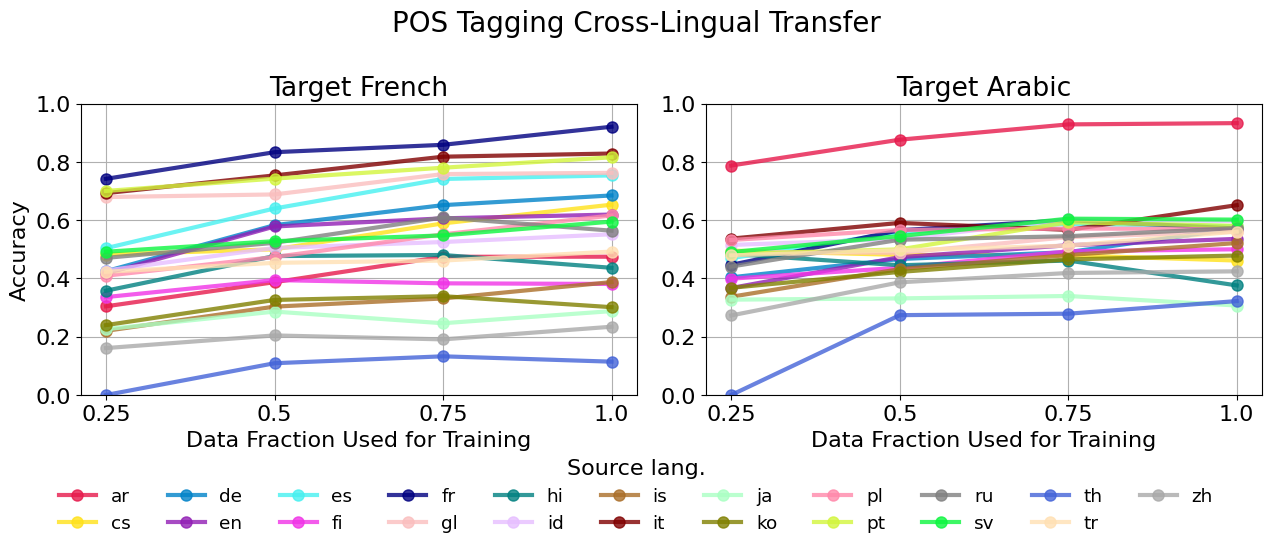

In [5]:
plot_eval_language(pos_results_per_eval, ["fr", "ar"], metric='accuracy', task='POS Tagging')

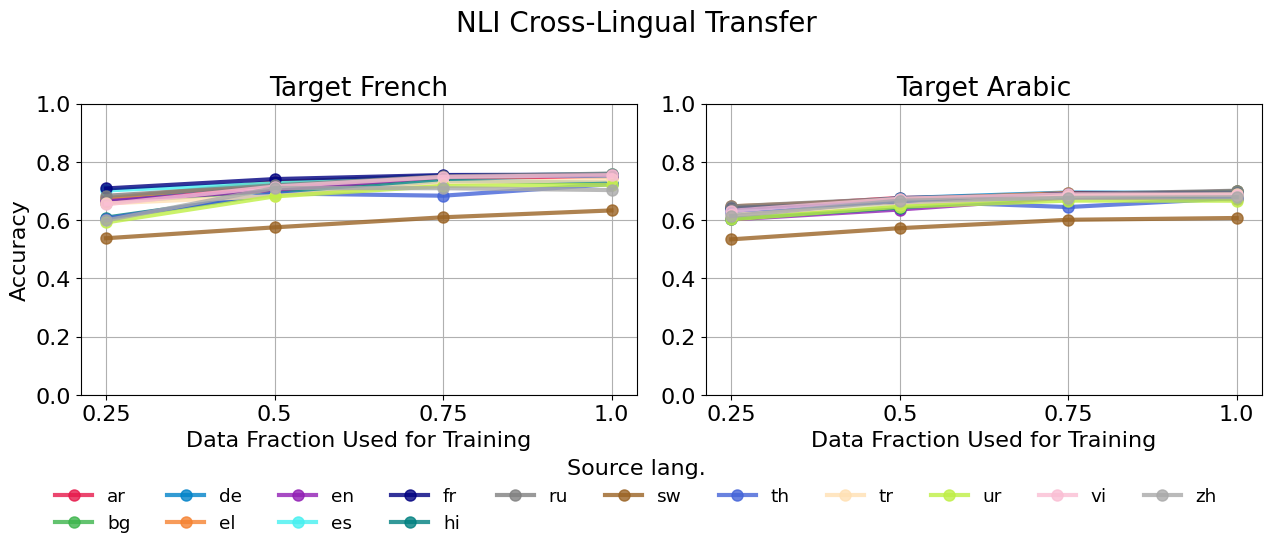

In [6]:
plot_eval_language(nli_results_per_eval, ["fr", "ar"], metric='accuracy', task='NLI')

In [7]:
data_fractions = ['0.25', '0.5', '0.75', '1.0']
correlations = {
    'pos': defaultdict(dict),
    'nli': defaultdict(dict)
}
pvals = {
    'pos': defaultdict(dict),
    'nli': defaultdict(dict)
}

print("Correlations for POS Tagging:")
distance_matrices = defaultdict(list)
distance_dfs = defaultdict(pd.DataFrame)
for distance in l2v.DISTANCES:
    distance_matrices[distance] = l2v.distance(distance, langs_three_digits)
    distance_matrix = distance_matrices[distance]
    distance_dfs[distance] = pd.DataFrame(distance_matrix, index=all_languages, columns=all_languages)
    distance_df = distance_dfs[distance]
    for frac in data_fractions:
        correlation, pval = compute_correlation(pos_results_per_eval, distance_dfs, distance, metric='accuracy', data_fraction=frac, visualize_heatmap=False)
        correlations['pos'][distance][frac] = correlation
        pvals['pos'][distance][frac] = pval

print("\nCorrelations for NLI:")
distance_matrices = defaultdict(list)
distance_dfs = defaultdict(pd.DataFrame)
for distance in l2v.DISTANCES:
    distance_matrices[distance] = l2v.distance(distance, langs_three_digits)
    distance_matrix = distance_matrices[distance]
    distance_dfs[distance] = pd.DataFrame(distance_matrix, index=all_languages, columns=all_languages)
    distance_df = distance_dfs[distance]
    for frac in data_fractions:
        correlation, pval = compute_correlation(nli_results_per_eval, distance_dfs, distance, metric='accuracy', data_fraction=frac, visualize_heatmap=False)
        correlations['nli'][distance][frac] = correlation
        pvals['nli'][distance][frac] = pval

Correlations for POS Tagging:
Spearman correlation for genetic distance (data fraction = 0.25): -0.629 (p = 7.14e-50)
Spearman correlation for genetic distance (data fraction = 0.5): -0.672 (p = 3.51e-59)
Spearman correlation for genetic distance (data fraction = 0.75): -0.686 (p = 1.27e-62)
Spearman correlation for genetic distance (data fraction = 1.0): -0.689 (p = 1.88e-63)
Spearman correlation for geographic distance (data fraction = 0.25): -0.588 (p = 2.14e-42)
Spearman correlation for geographic distance (data fraction = 0.5): -0.609 (p = 3.74e-46)
Spearman correlation for geographic distance (data fraction = 0.75): -0.624 (p = 6.57e-49)
Spearman correlation for geographic distance (data fraction = 1.0): -0.627 (p = 1.82e-49)
Spearman correlation for syntactic distance (data fraction = 0.25): -0.520 (p = 7.07e-32)
Spearman correlation for syntactic distance (data fraction = 0.5): -0.549 (p = 3.76e-36)
Spearman correlation for syntactic distance (data fraction = 0.75): -0.558 (p =

# Appendix

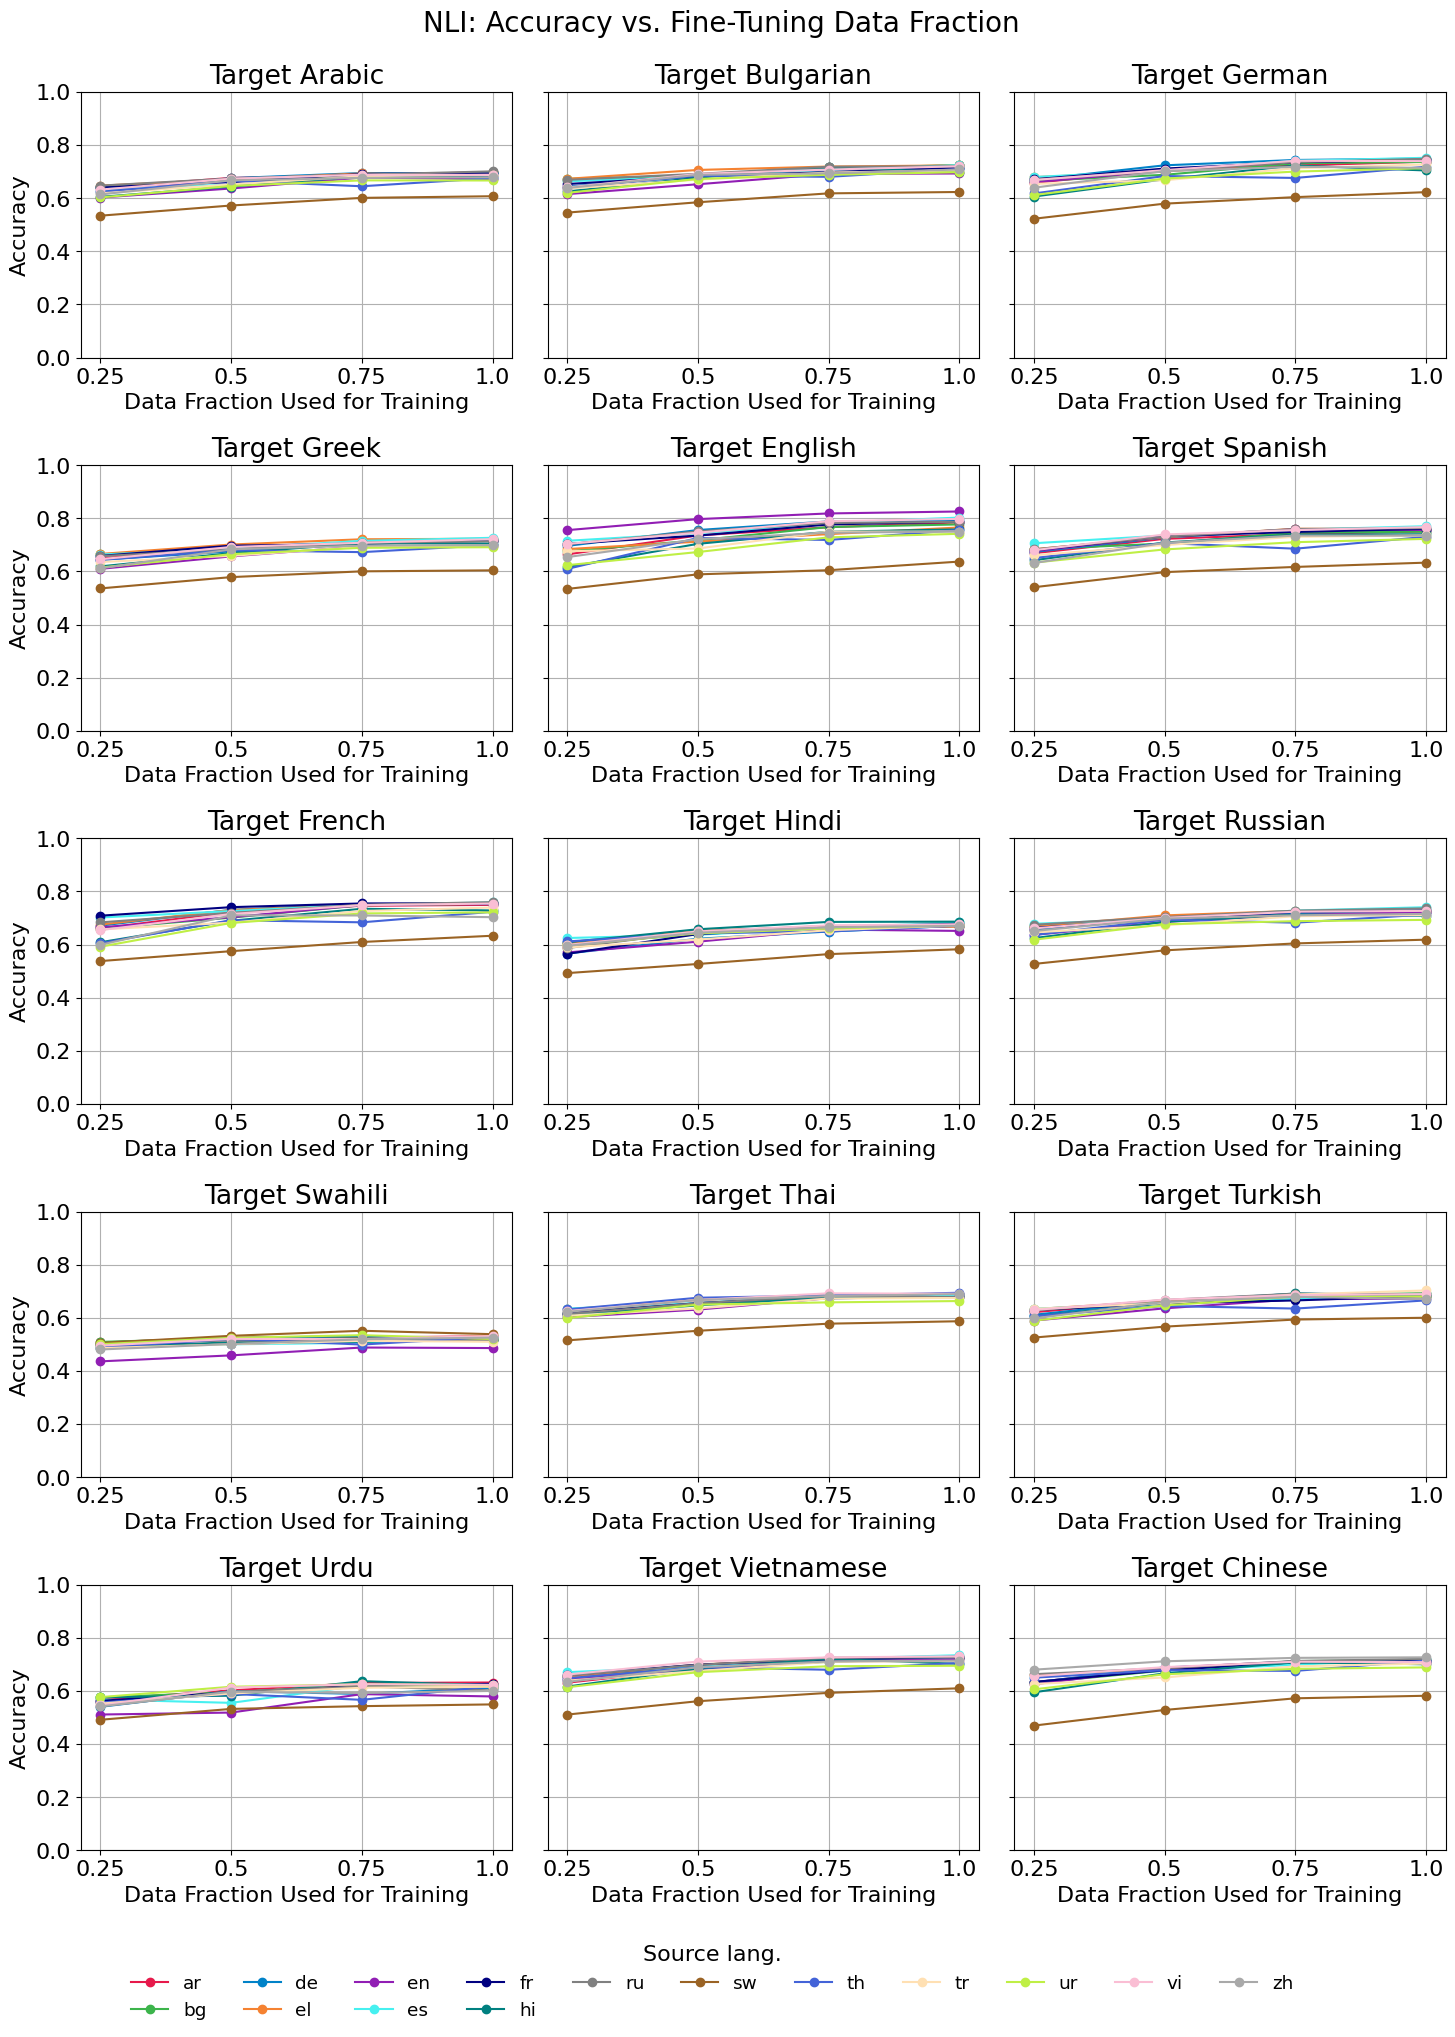

In [8]:
plot_accuracy_vs_data_fraction_per_eval(nli_results_per_eval, data_fractions, metric='accuracy', task="NLI")

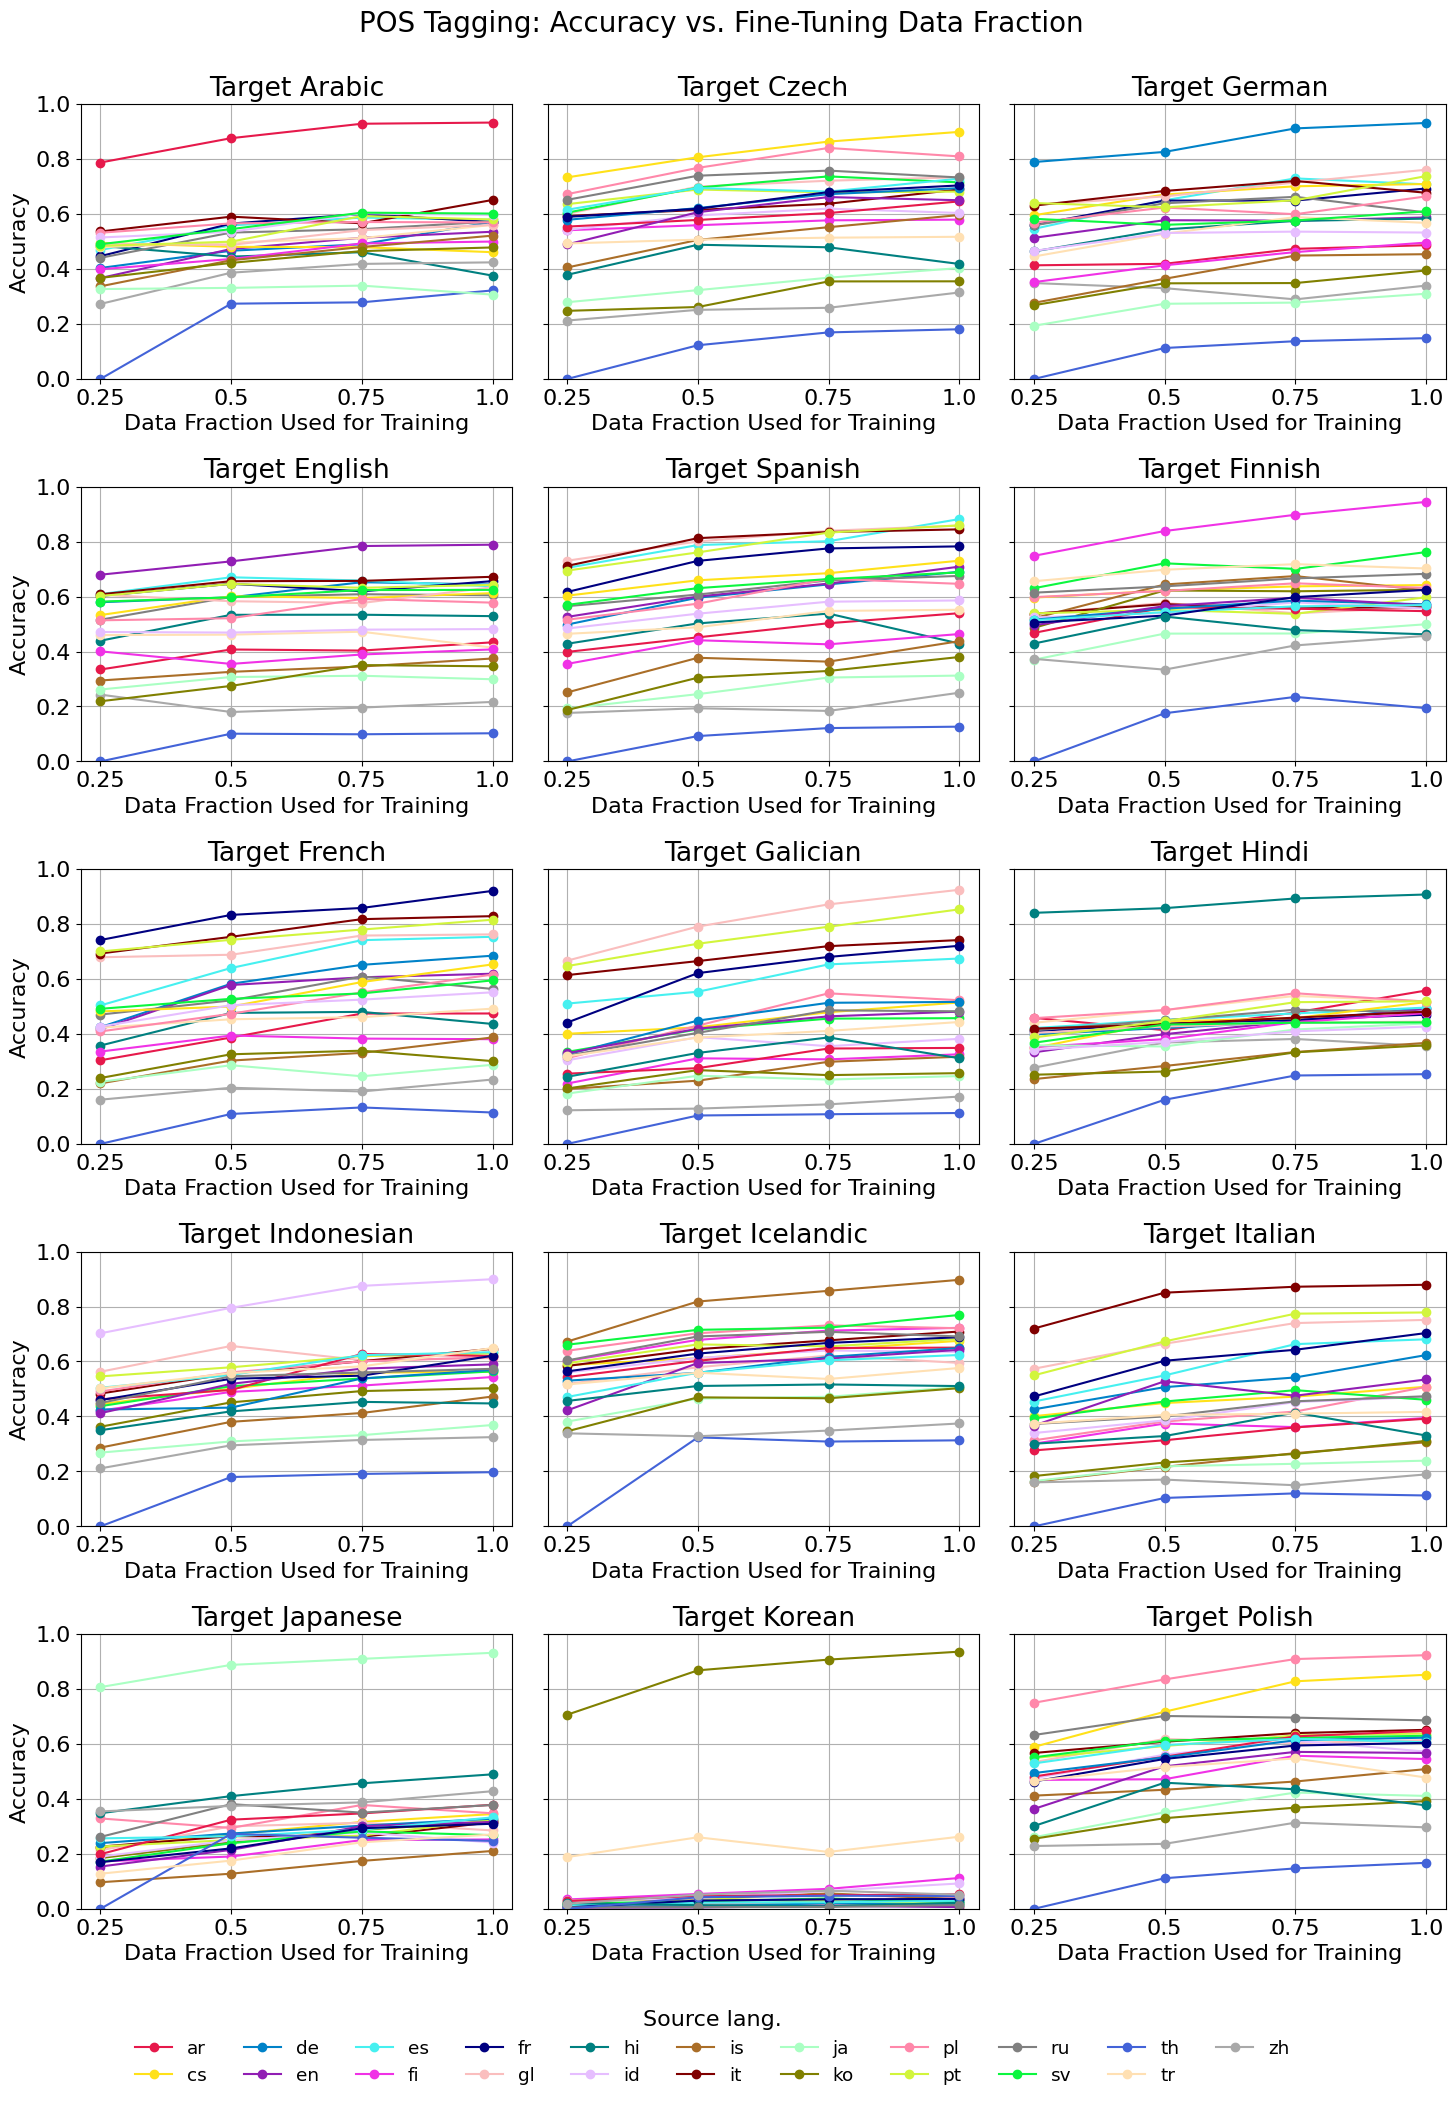

In [9]:
pos_languages = sorted(list(pos_results_per_eval.keys()))
plot_accuracy_vs_data_fraction_per_eval(pos_results_per_eval, data_fractions, metric='accuracy', task="POS Tagging", langs_eval=pos_languages[:15])

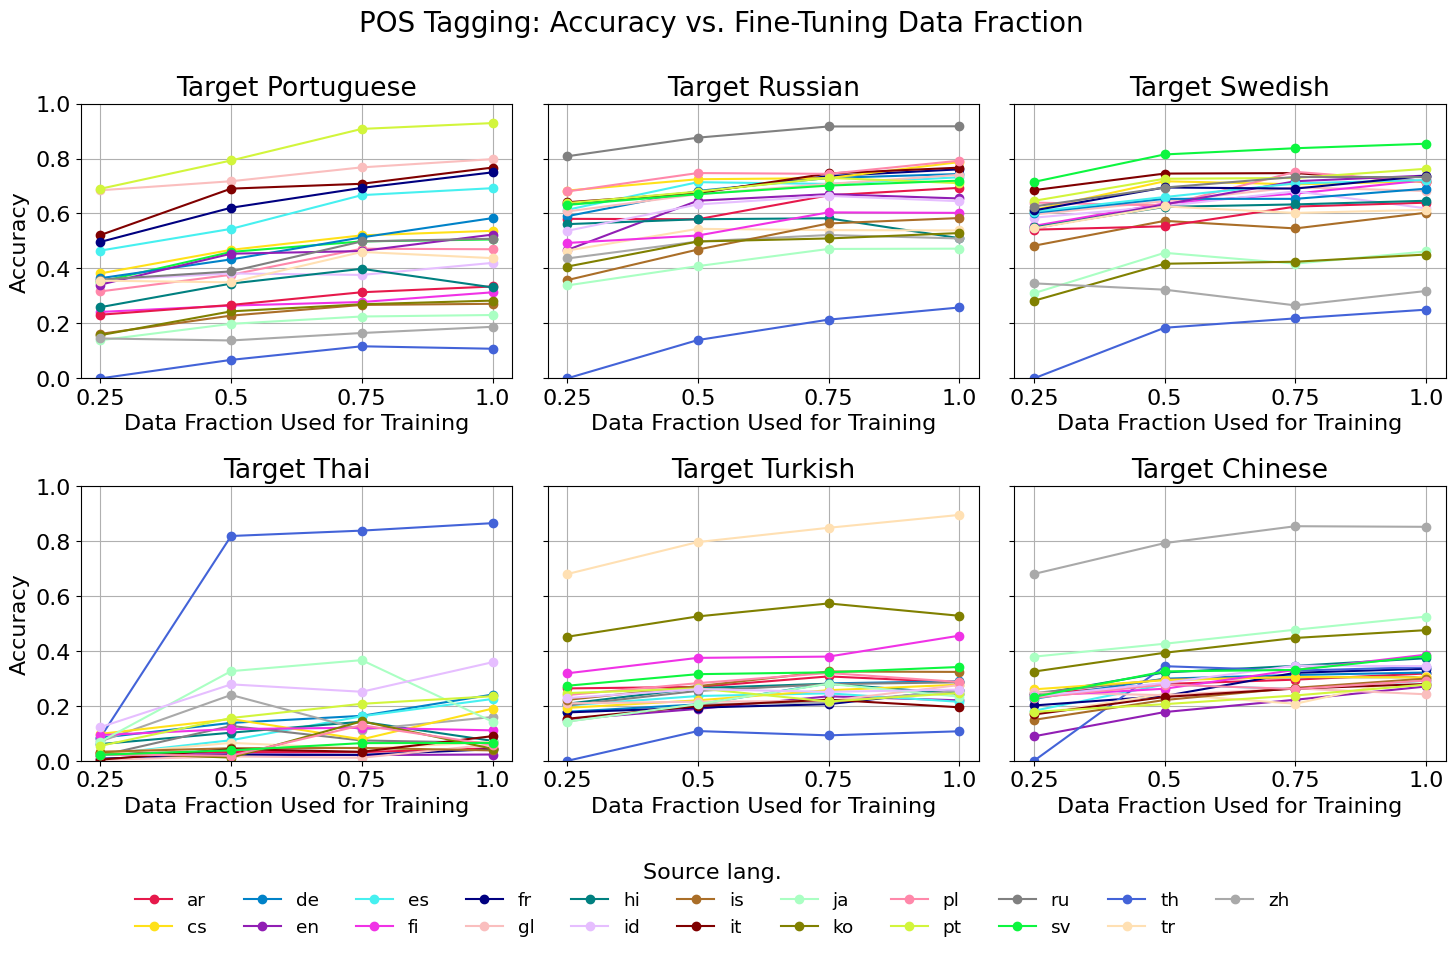

In [10]:
plot_accuracy_vs_data_fraction_per_eval(pos_results_per_eval, data_fractions, metric='accuracy', task="POS Tagging", langs_eval=pos_languages[15:])